In [118]:
import numpy as np
import matplotlib.pyplot as plt
from lumicks import pylake
import re

import glob
%matplotlib inline

In [173]:
dire='/mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190815 sytox orange dsDNA to ssDNA/'
files = glob.glob(dire+'*Kymograph*.h5')
print("molecule options:",end =" ")
for f in files:
    key=re.findall(r"[\d]*(?=\.)",f)[0]
    print(key,end =" ")
k=input("which molecule to look at? ")
for f in files:
    if re.search(r'\s' + k,f):
        filename=f
        print('opening '+filename)

# open file
file = pylake.File(filename)
kymos = list(file.kymos)
kymo_data = file.kymos[kymos[0]]
kymo = file.kymos[kymos[0]]

molecule options: 4 20 21 22 23 24 25 26 27 18 19 28 29 which molecule to look at? 19
opening /mnt/e/Olivia files/LAB/PROJECTS/C-trap things/190815 sytox orange dsDNA to ssDNA/20190815-185834 Kymograph 19.h5


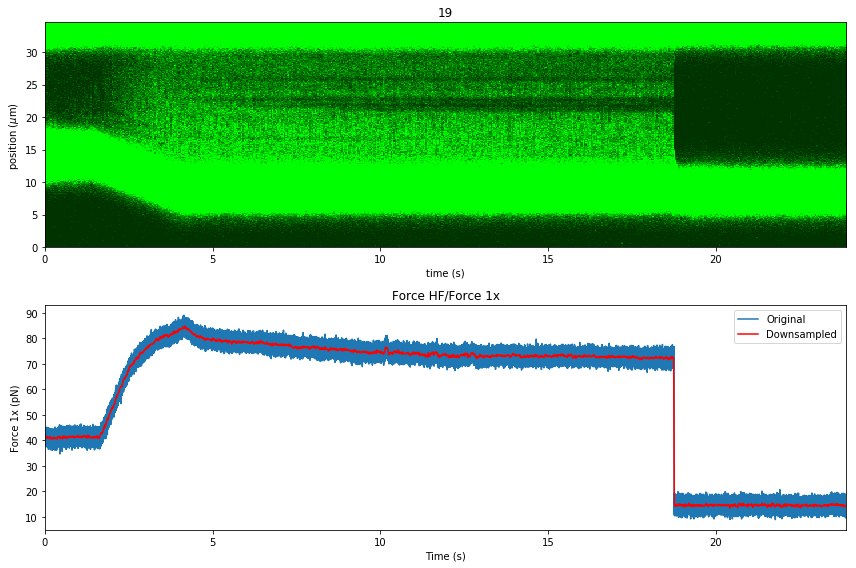

In [174]:
fig = plt.figure(figsize=(12,8))

plt.subplot(2,1,1)
kymo.plot_green(vmax=16,vmin=-4,aspect='auto')   #this is the best looking vmax/vmin combo so far

plt.subplot(2,1,2)
# Force in the x direction (pN)
forcex = file['Force HF']['Force 1x']
# time traces (seconds)
time = forcex.timestamps/1e9
time = time - time[0]
sample_rate = forcex.sample_rate
downsampled_rate = 100 # Hz
# downsample the force, nanostage position and time
forcex_downsamp = forcex.downsampled_by(int(sample_rate/downsampled_rate))
time_downsamp = forcex_downsamp.timestamps/1e9
time_downsamp = time_downsamp - time_downsamp[0]
forcex.plot(label="Original")
forcex_downsamp.plot(color='r',label="Downsampled")
plt.ylabel('Force 1x (pN)')
plt.xlim([0,max(time)])
plt.legend()
plt.tight_layout()

#if you want to save
#plt.savefig(dire+'kymo+force-'+k+'.png')

MED: [1.75943685] [1.00335378]
MED: [1.82941437] [1.03904539]
MED: [1.88939524] [1.13201901]
MED: [2.49920011] [1.00182749]
MED: [2.64915204] [1.08763594]
MED: [3.82877445] [1.08927854]
MED: [6.39795208] [1.10208118]
MED: [10.23672318] [-1.07822734]
MED: [11.4163456] [1.79927356]
MED: [11.43633914] [-1.0869636]
MED: [11.69625592] [-1.37893013]
MED: [12.5159936] [1.00156032]
MED: [12.6059649] [1.33487155]
 BIG: [18.74399996] [-29.49141838]
 BIG: [18.75399685] [-27.88777495]
MED: [20.66338563] [1.02267568]
MED: [20.9632895] [1.02528873]
MED: [22.53278732] [1.01570749]
time till break = [14.78456311]
time till break2 = [-3.95943685]


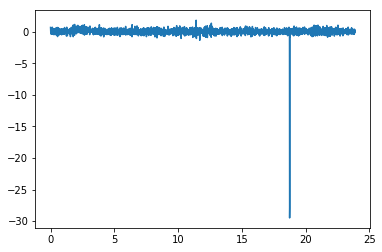

In [175]:
from numpy import diff
#derivative from downsampled data
tim=time_downsamp
fxd=forcex_downsamp.data

dy=diff(fxd)

last,tim=tim[-1],tim[:-1]
last,tim

fig=plt.figure()
plt.plot(tim,dy)

dist=5.5;rate=2.5
ramptime=dist/rate
tcs=0
tbr=0;tbr2=0
for d in dy:
    inde=np.where(dy==d)
    if abs(d)>3:
        print(" BIG: "+str(tim[inde])+' '+str(dy[inde]))
        if tbr==0:
            tbr=tim[inde]
        if tbr!=0 and round(tim[inde][0])!=round(tbr[0]):
            tbr2=tim[inde]
    if 1.< abs(d) <= 3:
        print("MED: "+str(tim[inde])+' '+str(dy[inde]))
        if tcs==0:
            tcs=tim[inde]

print('time till break = '+str(tbr-tcs-ramptime))
print('time till break2 = '+str(tbr2-tcs-ramptime))
        